# Libraries 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import i0
from numpy import exp, sin, cos
import seaborn as sns
import matplotlib as mpl
import os
from pathlib import Path
from statsFuncs import mean_confidence_interval
from statsFuncs import compDistributions
import scipy
import random

mpl.rcParams['axes.linewidth'] = 2

# Paths 

In [3]:
fig3_path = os.getcwd()
figures_path = str(Path(fig3_path).parent)
datapath = figures_path + '/data/radiologists/trials_forward/data_radio_forward/'

# Plot params 

In [4]:
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['font.serif'] = 'Myriad Pro'
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.labelweight'] = 'medium'

# Subject loop 

Get number of subjects, which is number of folders in datapath -1 (the super subject)

In [19]:
files = folders = 0

for _, dirnames, filenames in os.walk(datapath):
  # ^ this idiom means "we won't be using this value"
    files += len(filenames)
    folders += len(dirnames)

print("{:,} files, {:,} folders".format(files, folders))
print(str(folders-1) + ' subjects')
nSubjects = folders-1

99 files, 15 folders
14 subjects


In [20]:
subject_names = ['S1', 'S3', 'S4', 'S6', 'S7', 'S8', 's9', 's10', 's11', 's12', 's13', 's14', 's15']

## Calculate mean and error bars 

In [21]:
alldata_trimed = pd.DataFrame()
alldata = pd.DataFrame(columns=['SUBJECT', 'BOOTSTRAP_VALUES'])

row = 0
for subject in subject_names:
    subjectdata_temp = pd.DataFrame()
    
    # load data:
    subjectdata = pd.read_csv(datapath + subject + '/' + subject + '_VM_output_1nBack.csv')
    subjectdata_temp['BOOTSTRAP_VALUES'] = subjectdata['bootstrap_values']
    subjectdata_temp.loc[:, 'SUBJECT'] = subject
    
    print(subject)
    alldata_trimed.loc[row,'SUBJECT'] = subject
    
    mean, ci_low, ci_up = mean_confidence_interval.confidence_interval_percentile(subjectdata['bootstrap_values'])
    
    alldata_trimed.loc[row, 'BOOTSTRAP_MEAN'] = mean
    alldata_trimed.loc[row, 'BOOTSTRAP_CI_LOW'] = ci_low
    alldata_trimed.loc[row, 'BOOTSTRAP_CI_UP'] = ci_up
    
    if subject == 'S1':
        alldata = subjectdata_temp
    else:
        alldata = pd.concat([alldata, subjectdata_temp])
    
    row += 1
    

S1
S3
S4
S6
S7
S8
s9
s10
s11
s12
s13
s14
s15


## Organize error bars 

In [22]:
alldata_trimed_ci = pd.DataFrame(columns= subject_names)
for i in range(len(alldata_trimed)):
    
    print(i)
    subject = alldata_trimed.loc[i, 'SUBJECT']
    low = alldata_trimed.loc[i, 'BOOTSTRAP_MEAN'] - alldata_trimed.loc[i, 'BOOTSTRAP_CI_LOW']
    up = alldata_trimed.loc[i, 'BOOTSTRAP_CI_UP'] - alldata_trimed.loc[i, 'BOOTSTRAP_MEAN'] 
    
    alldata_trimed_ci.loc[0, subject] = low
    alldata_trimed_ci.loc[1, subject] = up

0
1
2
3
4
5
6
7
8
9
10
11
12


# Plot Fig 3 

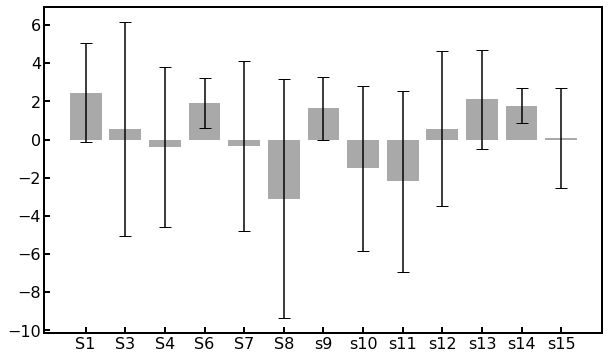

In [23]:
plt.figure(figsize=(10, 6))

plt.bar(alldata_trimed['SUBJECT'], alldata_trimed['BOOTSTRAP_MEAN'], yerr=alldata_trimed['BOOTSTRAP_CI_LOW'].to_numpy(), ecolor='black',
       capsize=6, color = 'darkgray')
plt.savefig('TrialsForward_HalfAmplitude_radiologists_v1.eps', bbox_inches='tight', dpi=1200)
plt.savefig('TrialsForward_HalfAmplitude_radiologists_v1.svg', bbox_inches='tight', dpi=1200)

## Subject 13: checking distribution and error bars 

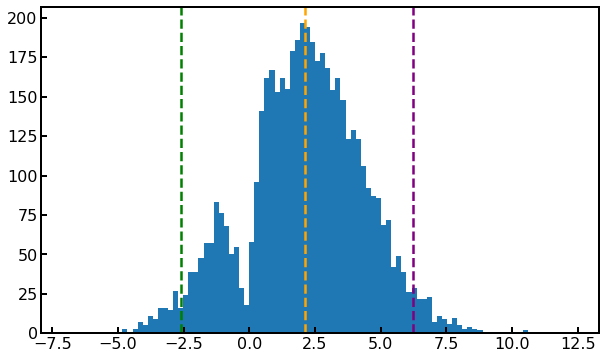

In [24]:
plt.figure(figsize=(10, 6))
weirddata = alldata[alldata['SUBJECT'] == 's13']
sorteddata = sorted(weirddata['BOOTSTRAP_VALUES'])
mean = np.mean(weirddata['BOOTSTRAP_VALUES'])

position_top = int(0.97*len(weirddata['BOOTSTRAP_VALUES']))
position_bottom = int(0.025*len(weirddata['BOOTSTRAP_VALUES']))

ci_low = sorteddata[position_bottom]
ci_up = sorteddata[position_top]


plt.hist(weirddata['BOOTSTRAP_VALUES'], 100)
plt.axvline(x=mean, linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.axvline(x=ci_low, linestyle='--', linewidth=2.5, label="lower bound 95% CI (sample_mean - 1.96*SE)", c='g')
plt.axvline(x=ci_up, linestyle='--', linewidth=2.5, label="upper bound 95% CI (sample_mean + 1.96*SE)", c='purple')


# Plot Fig 3 v2 

3 bars, for 1-back, 2-back and 3-back (group bootstrap)
on top of each bar, the boostrap means as mini circles

In [5]:
nTypes = ['1', '2', '3']
subject_names = ['Slope_and_Amp_Radio0',
                 'Slope_and_Amp_Radio2', 'Slope_and_Amp_Radio3', 'Slope_and_Amp_Radio4']


In [6]:

alldata_v2 = pd.DataFrame(columns=['SUBJECT', 'BOOTSTRAP_VALUES'])
ntype_data_trimed = pd.DataFrame()
ntype_data = pd.DataFrame()

row_type = 0
for ntype in nTypes:
    row = 0
    alldata_trimed_v2 = pd.DataFrame()
    for subject in subject_names:
        subjectdata_temp = pd.DataFrame()

        # load data:
        filename = datapath + subject + '/' + subject + '_VM_output_' + ntype + 'nBack.csv'
        subjectdata = pd.read_csv(filename)
        subjectdata_temp['BOOTSTRAP_VALUES'] = subjectdata['bootstrap_values']
        subjectdata_temp.loc[:, 'SUBJECT'] = subject
        subjectdata_temp.loc[:, 'NTYPE'] = ntype

        print(subject)
        alldata_trimed_v2.loc[row,'SUBJECT'] = subject

        mean, ci_low, ci_up = mean_confidence_interval.confidence_interval_percentile(subjectdata['bootstrap_values'])
        
        alldata_trimed_v2.loc[row, 'NTYPE'] = ntype
        alldata_trimed_v2.loc[row, 'BOOTSTRAP_MEAN'] = mean
        alldata_trimed_v2.loc[row, 'BOOTSTRAP_CI_LOW'] = ci_low
        alldata_trimed_v2.loc[row, 'BOOTSTRAP_CI_UP'] = ci_up

#         if subject == 'S1':
#             alldata_v2 = subjectdata_temp
#         else:
#             alldata_v2 = pd.concat([alldata_v2, subjectdata_temp])

        row += 1
    
    if ntype == '1':
        ntype_data = alldata_trimed_v2
        
    else:
        ntype_data = pd.concat([ntype_data, alldata_trimed_v2])
        
    print(len(alldata_trimed_v2))
    mean_type, ci_low_type, ci_up_type = mean_confidence_interval.mean_confidence_interval(alldata_trimed_v2['BOOTSTRAP_MEAN'])
    ntype_data_trimed.loc[row_type, 'NTYPE'] = alldata_trimed_v2.NTYPE.unique()
    ntype_data_trimed.loc[row_type, 'NTYPE_MEAN'] = mean_type
    ntype_data_trimed.loc[row_type, 'NTYPE_CI_LOW'] = ci_low_type
    ntype_data_trimed.loc[row_type, 'NTYPE_CI_UP'] = ci_up_type
    
    row_type += 1
    

    
    
        


Slope_and_Amp_Radio0
Slope_and_Amp_Radio2
Slope_and_Amp_Radio3
Slope_and_Amp_Radio4
4
Slope_and_Amp_Radio0
Slope_and_Amp_Radio2
Slope_and_Amp_Radio3
Slope_and_Amp_Radio4
4
Slope_and_Amp_Radio0
Slope_and_Amp_Radio2
Slope_and_Amp_Radio3
Slope_and_Amp_Radio4
4


In [7]:
alldata_ci_v2 = pd.DataFrame(columns= nTypes)
for i in range(len(ntype_data_trimed)):
    
    print(i)
    ntype = ntype_data_trimed.loc[i, 'NTYPE']
    low = ntype_data_trimed.loc[i, 'NTYPE_MEAN'] - ntype_data_trimed.loc[i, 'NTYPE_CI_LOW']
    up = ntype_data_trimed.loc[i, 'NTYPE_CI_UP'] - ntype_data_trimed.loc[i, 'NTYPE_MEAN'] 
    
    alldata_ci_v2.loc[0, ntype] = low
    alldata_ci_v2.loc[1, ntype] = up

0
1
2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

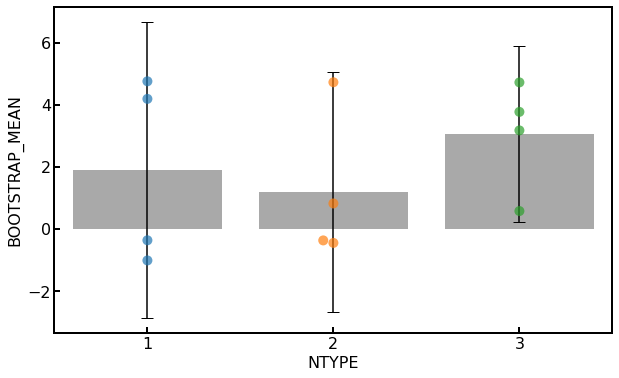

In [8]:
plt.figure(figsize=(10, 6))

plt.bar(ntype_data_trimed['NTYPE'], ntype_data_trimed['NTYPE_MEAN'], yerr=alldata_ci_v2.to_numpy(), ecolor='black',
       capsize=6, color = 'darkgray')
ax = sns.swarmplot(x='NTYPE', y="BOOTSTRAP_MEAN", data=ntype_data, dodge=True, size=10, alpha=0.7)
plt.savefig('TrialsForward_HalfAmplitude_radiologists_v2_peter.eps', bbox_inches='tight', dpi=1200)
plt.savefig('TrialsForward_HalfAmplitude_radiologists_v2_peter.svg', bbox_inches='tight', dpi=1200)

#  Plot Fig 3 v3

In [9]:
subject_names = ['Slope_and_Amp_Radio0',
                 'Slope_and_Amp_Radio2', 'Slope_and_Amp_Radio3', 'Slope_and_Amp_Radio4']

nTypes = ['1', '2', '3']

# alldata_v2 = pd.DataFrame(columns=['SUBJECT', 'BOOTSTRAP_VALUES'])
# ntype_data_trimed = pd.DataFrame()
# bootstrap_data = pd.DataFrame(columns=)
bootstrap_data = pd.DataFrame()
row_subject = 0
for ntype in nTypes:
    for subject in subject_names:
        print(subject)
        subjectdata_temp = pd.DataFrame()

        # load data:
        filename = datapath + subject + '/' + subject + '_VM_output_' + ntype + 'nBack.csv'
        subjectdata = pd.read_csv(filename)
        subjectdata_temp.loc[row_subject, 'SUBJECT'] = subject
        subjectdata_temp.loc[row_subject, 'TYPE'] = ntype

        for iteration in range(len(subjectdata['bootstrap_values'])):
            
            subjectdata_temp.loc[row_subject, str(iteration)] = subjectdata.loc[iteration, 'bootstrap_values']

#         alldata_trimed_v2.loc[row,'SUBJECT'] = subject

#         mean, ci_low, ci_up = mean_confidence_interval.confidence_interval_percentile(subjectdata['bootstrap_values'])
        
#         alldata_trimed_v2.loc[row, 'NTYPE'] = ntype
#         alldata_trimed_v2.loc[row, 'BOOTSTRAP_MEAN'] = mean
#         alldata_trimed_v2.loc[row, 'BOOTSTRAP_CI_LOW'] = ci_low
#         alldata_trimed_v2.loc[row, 'BOOTSTRAP_CI_UP'] = ci_up


    
        if (ntype == '1') & (subject == 'S1'):
            bootstrap_data = subjectdata_temp

        else:
            bootstrap_data = pd.concat([bootstrap_data, subjectdata_temp])
            
        row_subject += 1

        
    
#     mean_type, ci_low_type, ci_up_type = mean_confidence_interval.mean_confidence_interval(alldata_trimed_v2['BOOTSTRAP_MEAN'])
#     ntype_data_trimed.loc[row_type, 'NTYPE'] = alldata_trimed_v2.NTYPE.unique()
#     ntype_data_trimed.loc[row_type, 'NTYPE_MEAN'] = mean_type
#     ntype_data_trimed.loc[row_type, 'NTYPE_CI_LOW'] = ci_low_type
#     ntype_data_trimed.loc[row_type, 'NTYPE_CI_UP'] = ci_up_type
    
#     row_type += 1
    

    
    
        


Slope_and_Amp_Radio0
Slope_and_Amp_Radio2
Slope_and_Amp_Radio3
Slope_and_Amp_Radio4
Slope_and_Amp_Radio0
Slope_and_Amp_Radio2
Slope_and_Amp_Radio3
Slope_and_Amp_Radio4
Slope_and_Amp_Radio0
Slope_and_Amp_Radio2
Slope_and_Amp_Radio3
Slope_and_Amp_Radio4


In [10]:
bootstrap_trimed = pd.DataFrame()

row = 0
for ntype in nTypes:
    
    print(ntype)
    type_data = bootstrap_data[bootstrap_data['TYPE'] == ntype]
    
    for iteration in range(5000):
        
        column = str(iteration)
        print(column)
        bootstrap_trimed.loc[row,'TYPE'] = ntype
        bootstrap_trimed.loc[row, column] = np.mean(type_data[column])
        
    
    row += 1

1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276


1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096


3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801


498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747


2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2606
2607


4242
4243
4244
4245
4246
4247
4248
4249
4250
4251
4252
4253
4254
4255
4256
4257
4258
4259
4260
4261
4262
4263
4264
4265
4266
4267
4268
4269
4270
4271
4272
4273
4274
4275
4276
4277
4278
4279
4280
4281
4282
4283
4284
4285
4286
4287
4288
4289
4290
4291
4292
4293
4294
4295
4296
4297
4298
4299
4300
4301
4302
4303
4304
4305
4306
4307
4308
4309
4310
4311
4312
4313
4314
4315
4316
4317
4318
4319
4320
4321
4322
4323
4324
4325
4326
4327
4328
4329
4330
4331
4332
4333
4334
4335
4336
4337
4338
4339
4340
4341
4342
4343
4344
4345
4346
4347
4348
4349
4350
4351
4352
4353
4354
4355
4356
4357
4358
4359
4360
4361
4362
4363
4364
4365
4366
4367
4368
4369
4370
4371
4372
4373
4374
4375
4376
4377
4378
4379
4380
4381
4382
4383
4384
4385
4386
4387
4388
4389
4390
4391
4392
4393
4394
4395
4396
4397
4398
4399
4400
4401
4402
4403
4404
4405
4406
4407
4408
4409
4410
4411
4412
4413
4414
4415
4416
4417
4418
4419
4420
4421
4422
4423
4424
4425
4426
4427
4428
4429
4430
4431
4432
4433
4434
4435
4436
4437
4438
4439
4440
4441


1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1228
1229
1230
1231
1232
1233
1234
1235
1236
1237
1238
1239
1240
1241
1242
1243
1244
1245
1246
1247
1248
1249
1250
1251
1252
1253
1254
1255
1256
1257
1258
1259
1260
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307
1308
1309
1310
1311
1312
1313
1314
1315
1316
1317
1318
1319
1320
1321
1322
1323
1324
1325
1326
1327
1328
1329
1330
1331
1332
1333
1334
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344
1345
1346
1347
1348
1349
1350
1351
1352
1353
1354
1355
1356
1357
1358
1359
1360
1361
1362
1363
1364
1365
1366
1367
1368
1369
1370
1371
1372
1373
1374
1375
1376
1377
1378
1379
1380
1381
1382
1383
1384
1385
1386
1387
1388
1389
1390
1391
1392
1393
1394
1395
1396
1397
1398
1399
1400
1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1415
1416
1417


3124
3125
3126
3127
3128
3129
3130
3131
3132
3133
3134
3135
3136
3137
3138
3139
3140
3141
3142
3143
3144
3145
3146
3147
3148
3149
3150
3151
3152
3153
3154
3155
3156
3157
3158
3159
3160
3161
3162
3163
3164
3165
3166
3167
3168
3169
3170
3171
3172
3173
3174
3175
3176
3177
3178
3179
3180
3181
3182
3183
3184
3185
3186
3187
3188
3189
3190
3191
3192
3193
3194
3195
3196
3197
3198
3199
3200
3201
3202
3203
3204
3205
3206
3207
3208
3209
3210
3211
3212
3213
3214
3215
3216
3217
3218
3219
3220
3221
3222
3223
3224
3225
3226
3227
3228
3229
3230
3231
3232
3233
3234
3235
3236
3237
3238
3239
3240
3241
3242
3243
3244
3245
3246
3247
3248
3249
3250
3251
3252
3253
3254
3255
3256
3257
3258
3259
3260
3261
3262
3263
3264
3265
3266
3267
3268
3269
3270
3271
3272
3273
3274
3275
3276
3277
3278
3279
3280
3281
3282
3283
3284
3285
3286
3287
3288
3289
3290
3291
3292
3293
3294
3295
3296
3297
3298
3299
3300
3301
3302
3303
3304
3305
3306
3307
3308
3309
3310
3311
3312
3313
3314
3315
3316
3317
3318
3319
3320
3321
3322
3323


In [11]:
type_v3 = pd.DataFrame()
row=0
for ntype in nTypes:
    
    type_data = bootstrap_trimed[bootstrap_trimed['TYPE'] == ntype].reset_index(drop=True)
    mean, ci_low, ci_up = mean_confidence_interval.confidence_interval_percentile(type_data.iloc[0, 1:])
    
    type_v3.loc[row, 'TYPE'] = ntype
    type_v3.loc[row, 'MEAN'] = mean
    type_v3.loc[row, 'CI_LOW'] = ci_low
    type_v3.loc[row, 'CI_UP'] = ci_up
    
    row += 1
    

In [12]:
alldata_ci_v3 = pd.DataFrame(columns= nTypes)
for i in range(len(type_v3)):
    
    print(i)
    ntype = type_v3.loc[i, 'TYPE']
    low = type_v3.loc[i, 'MEAN'] - type_v3.loc[i, 'CI_LOW']
    up = type_v3.loc[i, 'CI_UP'] - type_v3.loc[i, 'MEAN'] 
    
    alldata_ci_v3.loc[0, ntype] = low
    alldata_ci_v3.loc[1, ntype] = up

0
1
2


In [13]:
boostrap_trimed_reorganized = pd.DataFrame()
row = 0
for ntype in nTypes:
    
    type_data = bootstrap_trimed[bootstrap_trimed['TYPE'] == ntype].reset_index(drop=True)

    for iteration in range(5000):
        
        
        boostrap_trimed_reorganized.loc[row, 'TYPE'] = ntype
        boostrap_trimed_reorganized.loc[row, 'BOOSTRAP_MEAN'] = type_data.loc[0, str(iteration)]
        
        
        row += 1
        
        

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

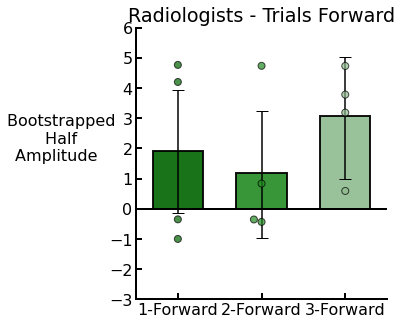

In [14]:
plt.figure(figsize=(4.5, 5))

plt.bar(type_v3['TYPE'], type_v3['MEAN'], yerr=alldata_ci_v3.to_numpy(), ecolor='black',
       capsize=6,color = ['darkgreen', 'forestgreen', 'darkseagreen'], edgecolor='k', alpha=0.9, width=0.6, linewidth=2)
# ax = sns.swarmplot(x='TYPE', y="BOOSTRAP_MEAN", data=boostrap_trimed_reorganized, dodge=True, size=10, alpha=0.7)
ax = sns.swarmplot(x='NTYPE', y="BOOTSTRAP_MEAN", data=ntype_data, dodge=True, size=7, alpha=0.7,edgecolor='k', linewidth=1, palette=['darkgreen', 'forestgreen', 'darkseagreen'])
sns.despine()
plt.ylabel('Bootstrapped                 \nHalf                 \nAmplitude                   ', rotation=0)
plt.xlabel('')
plt.ylim([-3, 6])
ax.set_xticklabels(['1-Forward', '2-Forward', '3-Forward'])
plt.axhline(0, linestyle='-', linewidth=2, c='k')
sns.despine()
plt.yticks(np.arange(-3, 7, 1.0))
plt.title('Radiologists - Trials Forward')
plt.savefig('TrialsForward_HalfAmplitude_radiologists_v3_peter.eps', bbox_inches='tight', dpi=1200)
plt.savefig('TrialsForward_HalfAmplitude_radiologists_v3_peter.svg', bbox_inches='tight', dpi=1200)
plt.savefig('TrialsForward_HalfAmplitude_radiologists_v3_peter.jpg', bbox_inches='tight', dpi=1200)

In [15]:
# export subject data
ntype_data.to_csv('nforwards_halfamplitudes_radiologists_peter.csv')

## Test significance of bars 

0.9642


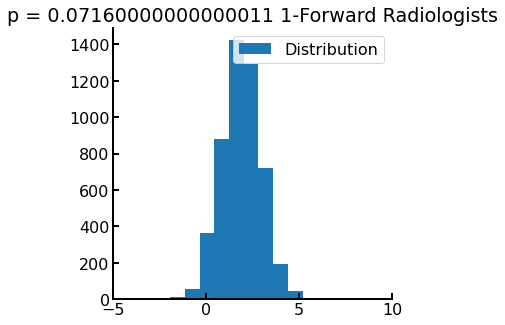

In [16]:
compDistributions.sigDistribution(bootstrap_trimed.iloc[0, 1:], extra_title=' 1-Forward Radiologists', xlim=[-5, 10])

0.8588


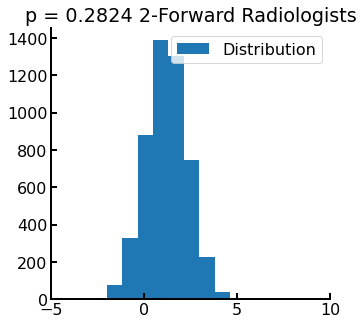

In [17]:
compDistributions.sigDistribution(bootstrap_trimed.iloc[1, 1:], extra_title=' 2-Forward Radiologists', xlim=[-5, 10])

0.9986


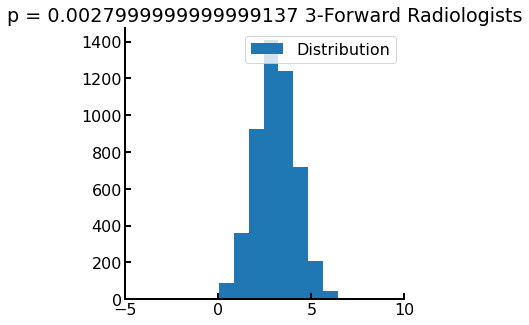

In [18]:
compDistributions.sigDistribution(bootstrap_trimed.iloc[2, 1:], extra_title=' 3-Forward Radiologists', xlim=[-5, 10])

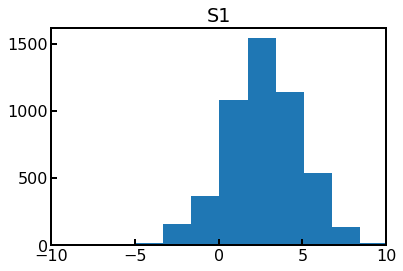

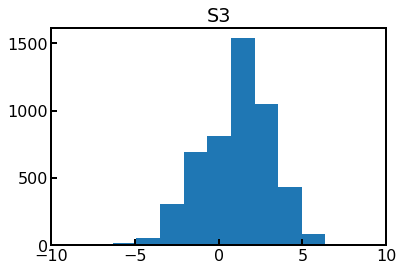

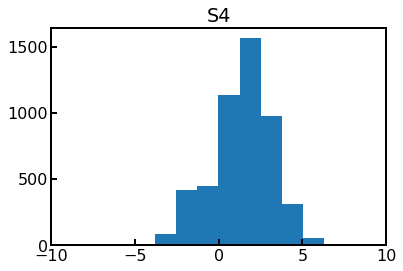

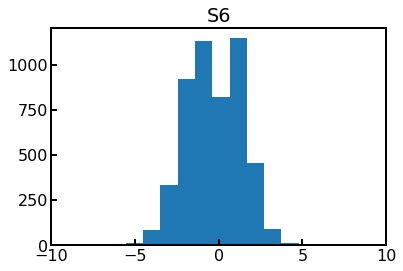

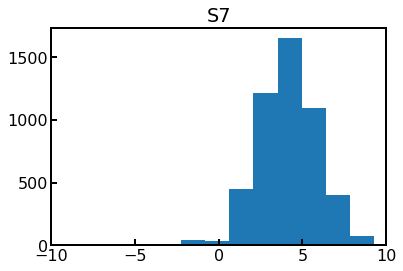

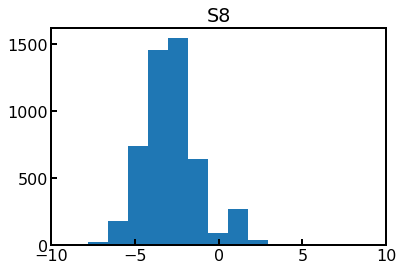

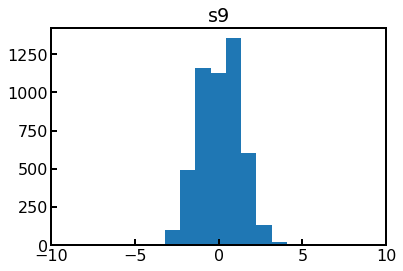

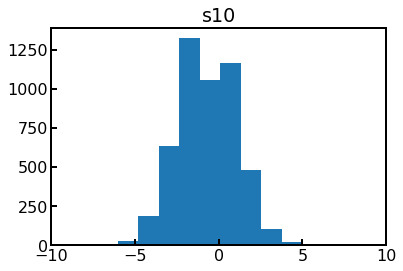

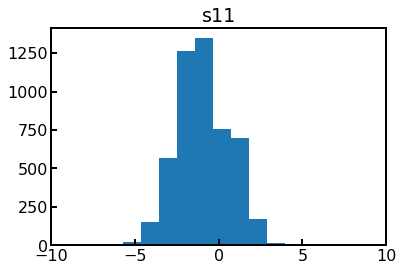

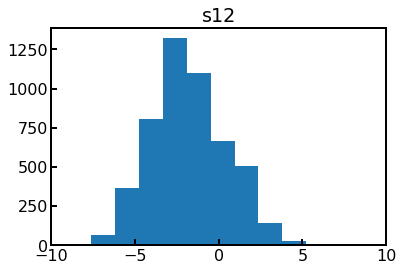

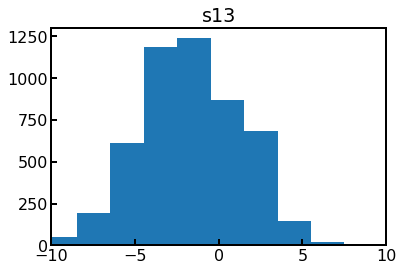

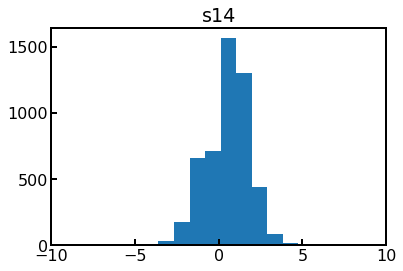

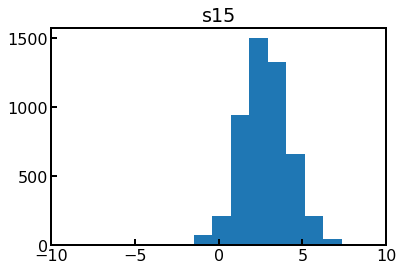

In [38]:
nBack2 = bootstrap_data[bootstrap_data['TYPE'] == '2']
for subject in nBack2.SUBJECT.unique():
    
    subdata = nBack2[nBack2['SUBJECT'] == subject].reset_index(drop=True)
    plt.hist(subdata.iloc[0, 2:])
    plt.title(subject)
    plt.xlim([-10, 10])
    plt.show()

## Run bootstrapped means 

In [39]:
nBack2_means = ntype_data[ntype_data['NTYPE'] == '2']
nBack2_means

,SUBJECT,NTYPE,BOOTSTRAP_MEAN,BOOTSTRAP_CI_LOW,BOOTSTRAP_CI_UP
0,S1,2,2.665394,-1.947150,6.827639
1,S3,2,1.099434,-3.031065,4.615540
2,S4,2,1.395496,-2.340329,4.358035
3,S6,2,-0.272780,-3.320737,2.543843
4,S7,2,4.150572,0.886924,7.413800
5,S8,2,-2.853183,-5.739760,1.044558
6,s9,2,0.087416,-2.212098,2.266003
7,s10,2,-0.736916,-4.014136,2.397266
8,s11,2,-0.916144,-3.792507,1.910581
9,s12,2,-1.792512,-5.865963,2.469663


0.5384615384615384


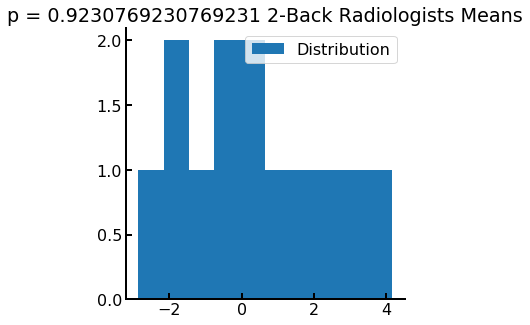

In [40]:
compDistributions.sigDistribution(nBack2_means['BOOTSTRAP_MEAN'], extra_title=' 2-Back Radiologists Means')

In [41]:
nIterations = 5000
nSubjects = len(nBack2_means['BOOTSTRAP_MEAN'])
iteration_means = list()
iteration_df = pd.DataFrame()

row = 0
for iteration in range(nIterations):
    iteration_sample = random.choices(nBack2_means['BOOTSTRAP_MEAN'], k=nSubjects)
    iteration_means.append(np.mean(iteration_sample))
    iteration_df.loc[iteration, 'MEAN'] = np.mean(iteration_sample)

0.7462


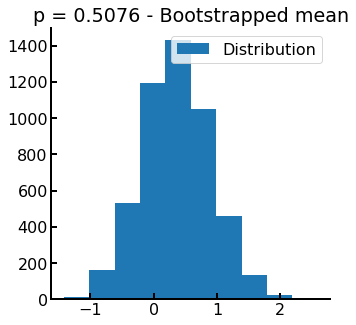

In [42]:
compDistributions.sigDistribution(iteration_df['MEAN'], extra_title=' - Bootstrapped mean')